# Move Classifier Dataset Exploration




## Code
### Imports

In [1]:
import os
import cv2
import json
import numpy as np
from IPython.display import Image 
import pandas as pd
from tqdm import tqdm
from random import randint

### Functions

In [2]:
def showSample(path, startFrame, numFrames):
    for i in range(startFrame, startFrame+numFrames):
        print(path + "/" + str(i) + ".jpg")
        try:
            display(Image(filename=path + "/" + str(i) + ".jpg"))
        except:
            print("Game Finished.")
            break

In [3]:
def gatherData(dataPathList):
    samples = []
    for dataPath in dataPathList:
        for folder in os.listdir(dataPath):
            samples.append(dataPath + folder)

    return samples

### Options

In [4]:
NUMFRAMES = 2
DATAPATHS = ["../assets/datasets/Move Classifier Data/MineRLBasaltFindCave-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltCreateVillageAnimalPen-v0/", 
                            "../assets/datasets/Move Classifier Data/MineRLBasaltMakeWaterfall-v0/"]

### Sample From Files

In [5]:
paths = gatherData(DATAPATHS)
path = paths[randint(0, len(paths))]
print("Sampled: ", path)
df = pd.read_csv(path + "/moves.csv")
df.head()

Sampled:  ../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375


,attack,back,forward,jump,left,right,sneak,sprint,use,drop,...,hotbar.4,hotbar.5,hotbar.6,hotbar.7,hotbar.8,hotbar.9,ESC,camera1,camera2,startImage
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.000000,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.615394,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.615394,0.615394,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609499,-1.609499,3
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.615394,-0.615394,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attack      14400 non-null  int64  
 1   back        14400 non-null  int64  
 2   forward     14400 non-null  int64  
 3   jump        14400 non-null  int64  
 4   left        14400 non-null  int64  
 5   right       14400 non-null  int64  
 6   sneak       14400 non-null  int64  
 7   sprint      14400 non-null  int64  
 8   use         14400 non-null  int64  
 9   drop        14400 non-null  int64  
 10  inventory   14400 non-null  int64  
 11  hotbar.1    14400 non-null  int64  
 12  hotbar.2    14400 non-null  int64  
 13  hotbar.3    14400 non-null  int64  
 14  hotbar.4    14400 non-null  int64  
 15  hotbar.5    14400 non-null  int64  
 16  hotbar.6    14400 non-null  int64  
 17  hotbar.7    14400 non-null  int64  
 18  hotbar.8    14400 non-null  int64  
 19  hotbar.9    14400 non-nul

In [7]:
df.describe()

,attack,back,forward,jump,left,right,sneak,sprint,use,drop,...,hotbar.4,hotbar.5,hotbar.6,hotbar.7,hotbar.8,hotbar.9,ESC,camera1,camera2,startImage
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.0,14400.000000,14400.000000,14400.000000
mean,0.455069,0.066458,0.242847,0.108542,0.033611,0.045139,0.024236,0.135556,0.024583,0.000208,...,0.003264,0.002500,0.001458,0.000556,0.000139,0.000069,0.0,0.008950,0.033701,7199.500000
std,0.497994,0.249090,0.428818,0.311074,0.180232,0.207616,0.153787,0.342328,0.154857,0.014433,...,0.057039,0.049939,0.038162,0.023564,0.011785,0.008333,0.0,2.103115,2.386365,4157.066273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-10.000000,-10.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3599.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7199.500000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10799.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,10.000000,10.000000,14399.000000


### Show Sample of Moving Forward

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            1.000000
sneak            0.000000
sprint           1.000000
use              0.000000
drop             0.000000
inventory        0.000000
hotbar.1         0.000000
hotbar.2         0.000000
hotbar.3         0.000000
hotbar.4         0.000000
hotbar.5         0.000000
hotbar.6         0.000000
hotbar.7         0.000000
hotbar.8         0.000000
hotbar.9         0.000000
ESC              0.000000
camera1         -0.615394
camera2         -0.615394
startImage    1025.000000
Name: 1025, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/1025.jpg


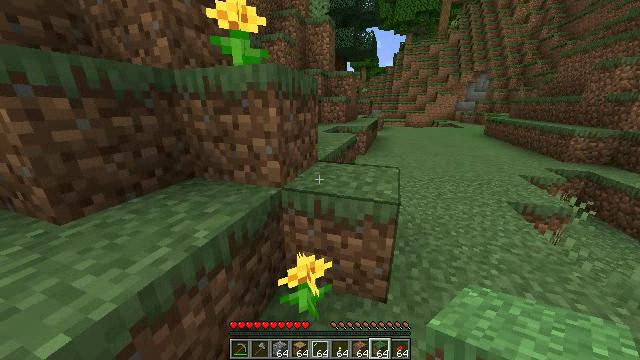

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/1026.jpg


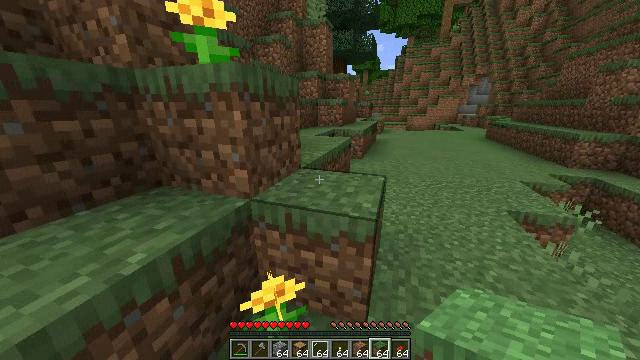

In [8]:
sample = df[df["forward"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Backward

attack           1.0
back             1.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    5338.0
Name: 5338, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/5338.jpg


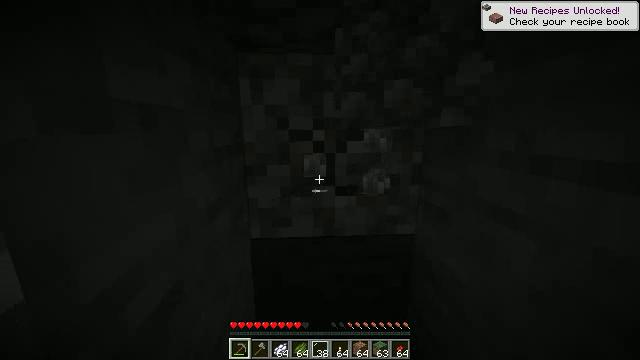

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/5339.jpg


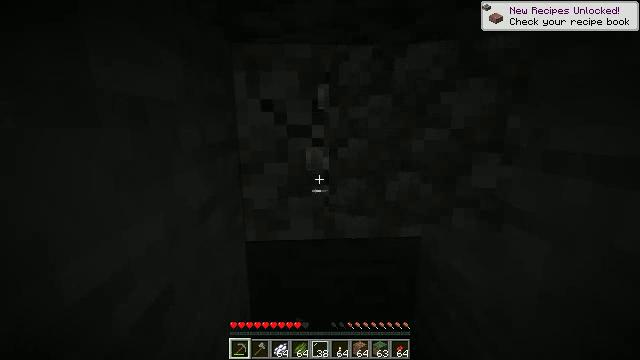

In [9]:
sample = df[df["back"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Left

attack           1.000000
back             0.000000
forward          0.000000
jump             0.000000
left             1.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
hotbar.1         0.000000
hotbar.2         0.000000
hotbar.3         0.000000
hotbar.4         0.000000
hotbar.5         0.000000
hotbar.6         0.000000
hotbar.7         0.000000
hotbar.8         0.000000
hotbar.9         0.000000
ESC              0.000000
camera1          0.615394
camera2          0.615394
startImage    1566.000000
Name: 1566, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/1566.jpg


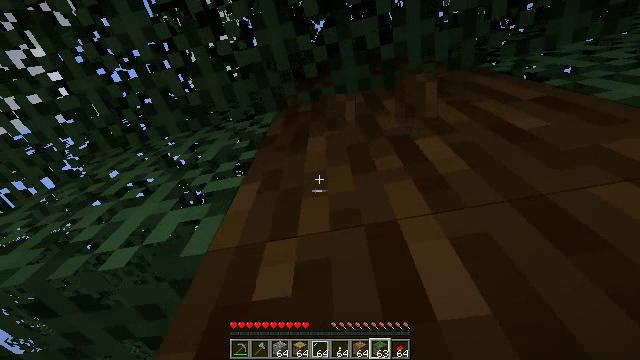

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/1567.jpg


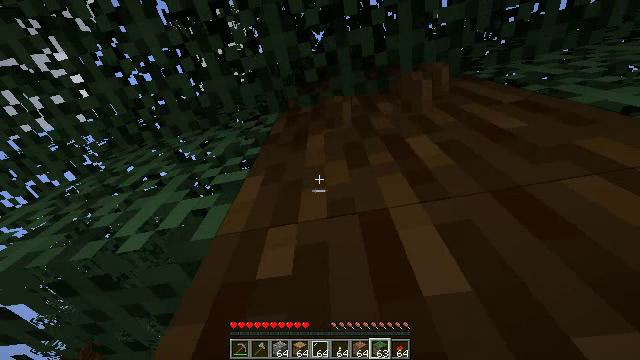

In [10]:
sample = df[df["left"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Right

attack           0.0
back             1.0
forward          0.0
jump             0.0
left             0.0
right            1.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    7340.0
Name: 7340, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/7340.jpg


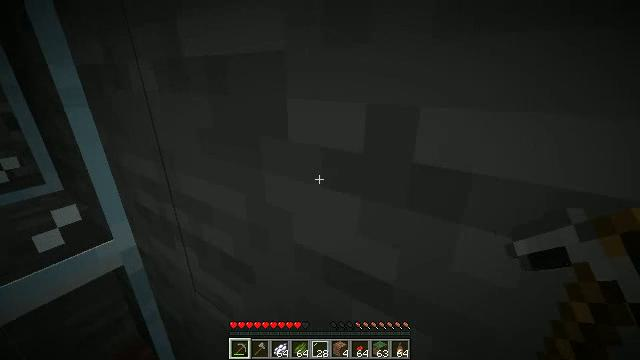

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/7341.jpg


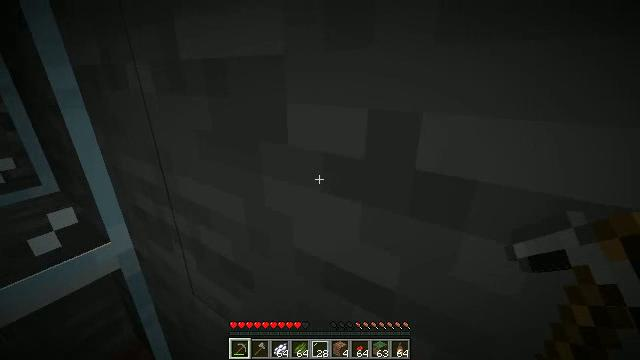

In [11]:
sample = df[df["right"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Sneaking

attack           1.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            1.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    7069.0
Name: 7069, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/7069.jpg


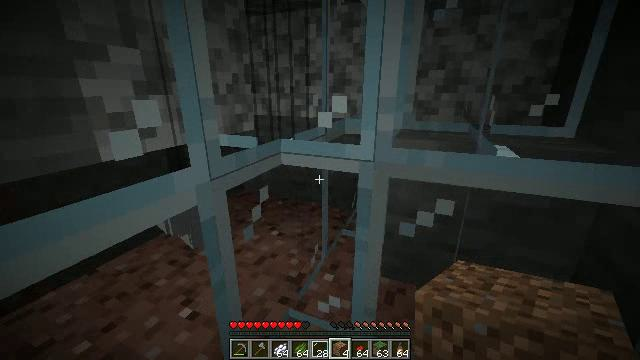

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/7070.jpg


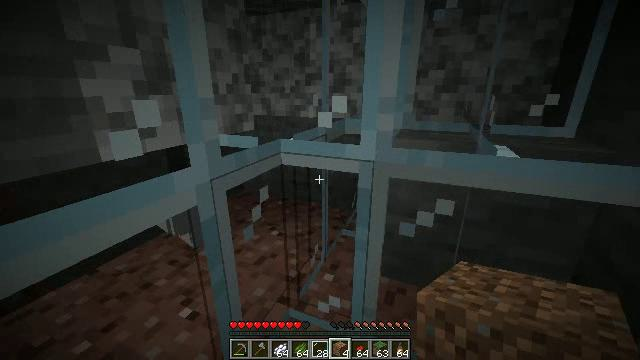

In [12]:
sample = df[df["sneak"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Sprinting

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           1.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    1500.0
Name: 1500, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/1500.jpg


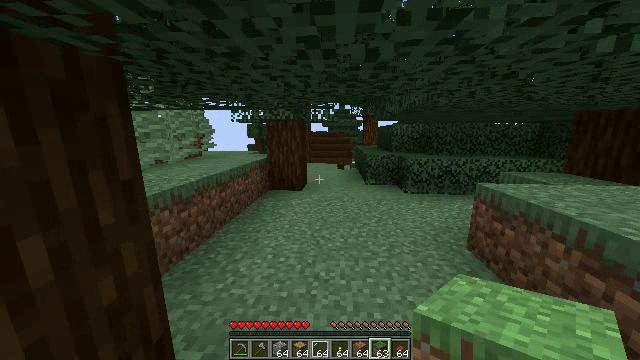

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/1501.jpg


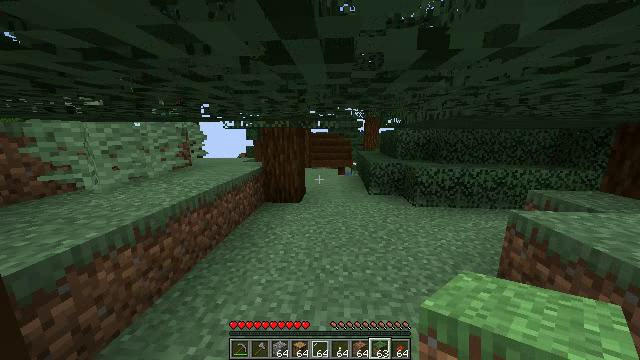

In [13]:
sample = df[df["sprint"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of an Left Click

attack           1.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    4552.0
Name: 4552, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/4552.jpg


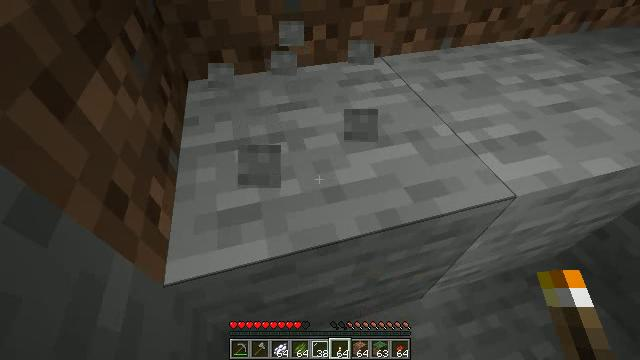

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/4553.jpg


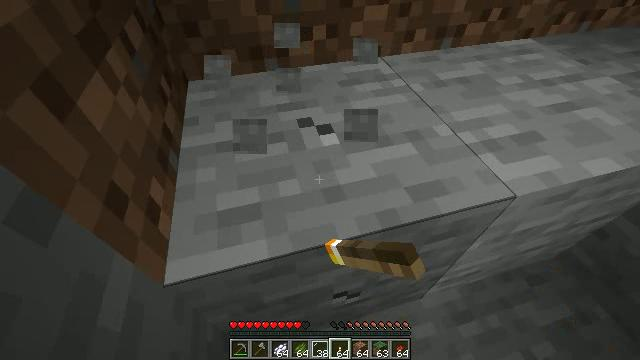

In [14]:
sample = df[df["attack"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Right Click

attack            0.0
back              0.0
forward           0.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               1.0
drop              0.0
inventory         0.0
hotbar.1          0.0
hotbar.2          0.0
hotbar.3          0.0
hotbar.4          0.0
hotbar.5          0.0
hotbar.6          0.0
hotbar.7          0.0
hotbar.8          0.0
hotbar.9          0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    12448.0
Name: 12448, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/12448.jpg


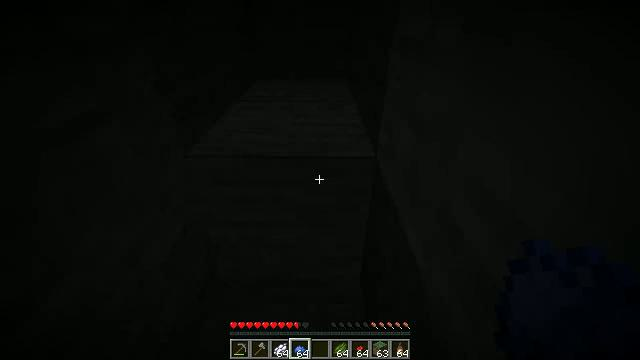

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/12449.jpg


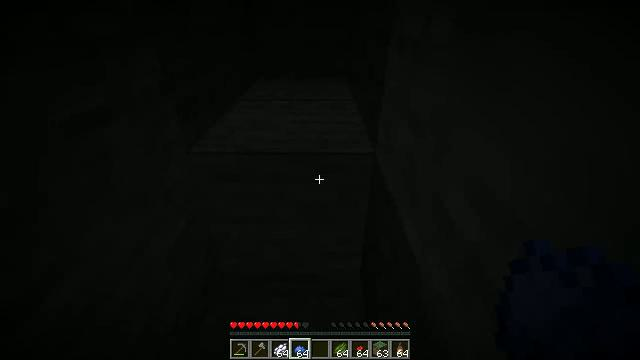

In [15]:
sample = df[df["use"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Dropping Item

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             1.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    2863.0
Name: 2863, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/2863.jpg


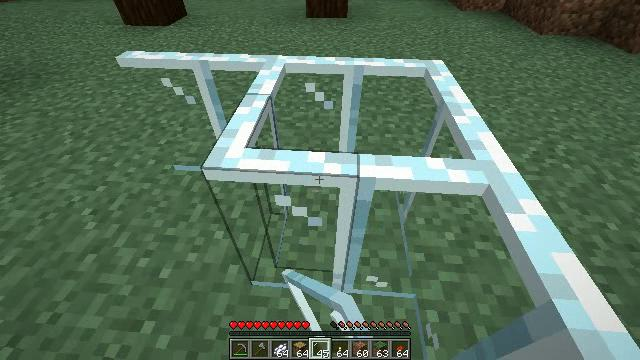

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/2864.jpg


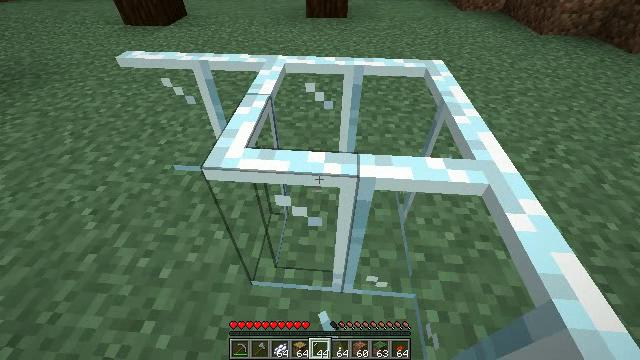

In [16]:
sample = df[df["drop"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Open Inventory

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
hotbar.1         0.000000
hotbar.2         0.000000
hotbar.3         0.000000
hotbar.4         0.000000
hotbar.5         0.000000
hotbar.6         0.000000
hotbar.7         0.000000
hotbar.8         0.000000
hotbar.9         0.000000
ESC              0.000000
camera1          0.615394
camera2          0.615394
startImage    9455.000000
Name: 9455, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9455.jpg


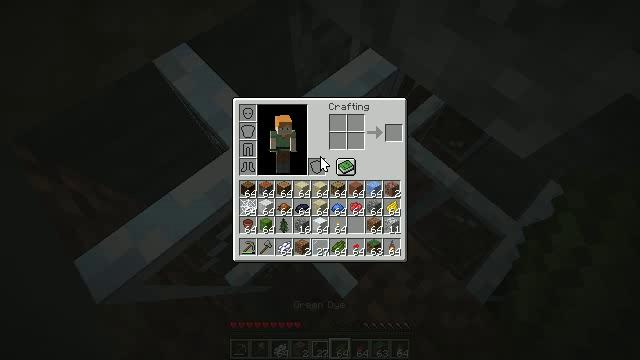

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9456.jpg


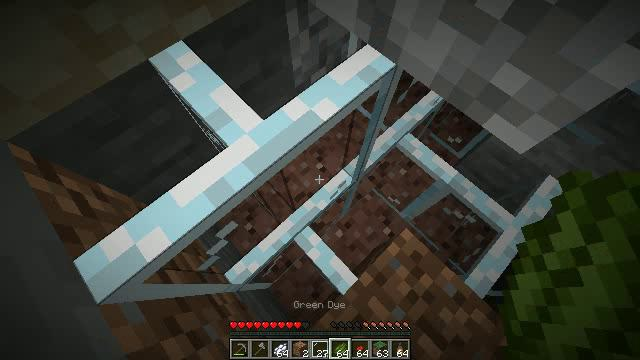

In [17]:
sample = df[df["inventory"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 1

attack           0.0
back             0.0
forward          1.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         1.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    5523.0
Name: 5523, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/5523.jpg


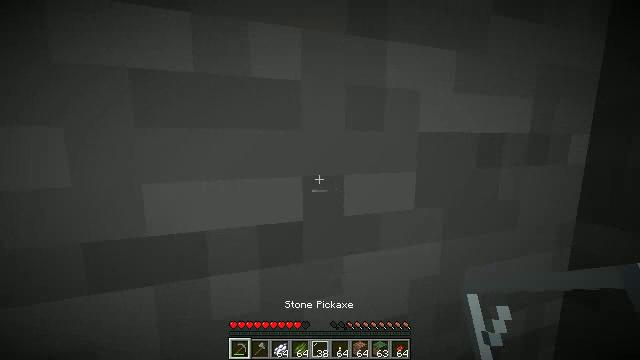

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/5524.jpg


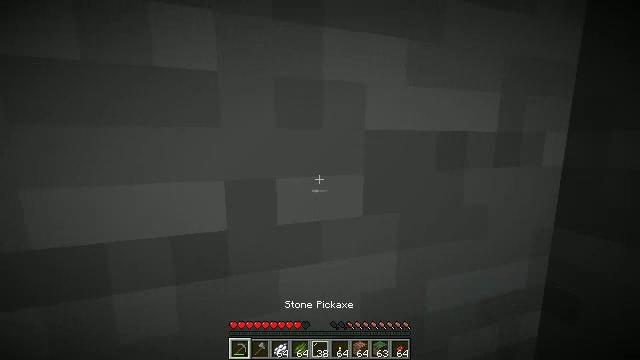

In [18]:
sample = df[df["hotbar.1"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 2

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         1.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    8683.0
Name: 8683, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/8683.jpg


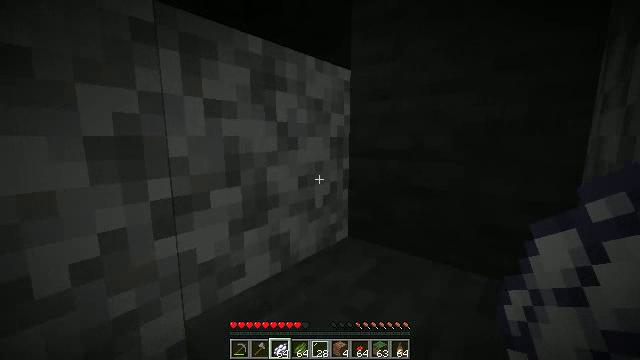

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/8684.jpg


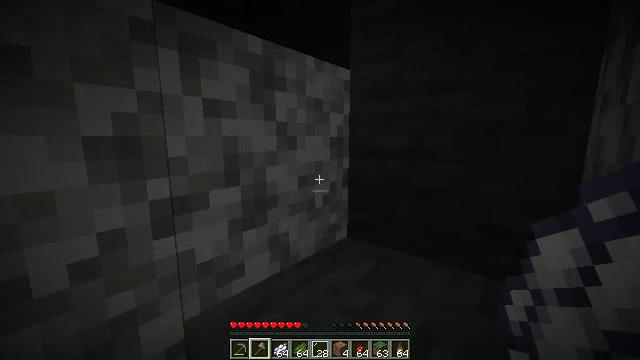

In [19]:
sample = df[df["hotbar.2"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 3

attack            0.0
back              1.0
forward           0.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
hotbar.1          0.0
hotbar.2          0.0
hotbar.3          1.0
hotbar.4          0.0
hotbar.5          0.0
hotbar.6          0.0
hotbar.7          0.0
hotbar.8          0.0
hotbar.9          0.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    12983.0
Name: 12983, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/12983.jpg


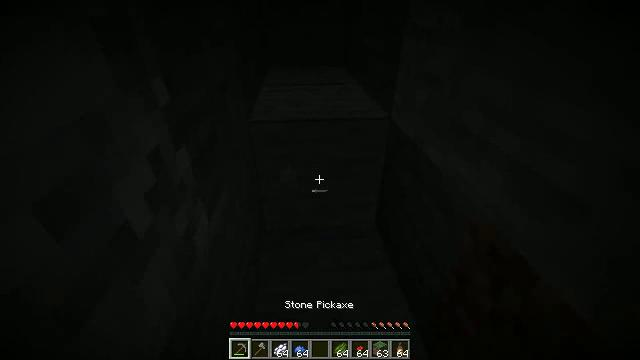

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/12984.jpg


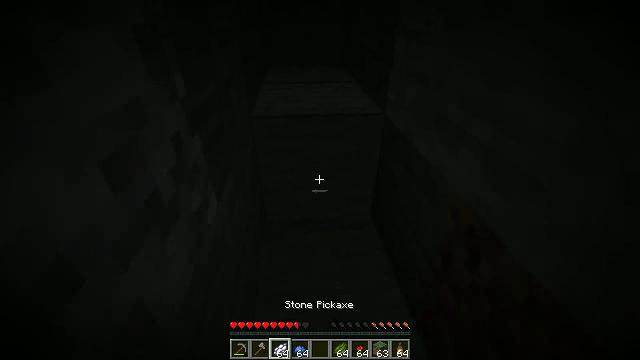

In [20]:
sample = df[df["hotbar.3"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 4

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         1.0
hotbar.5         0.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    9541.0
Name: 9541, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9541.jpg


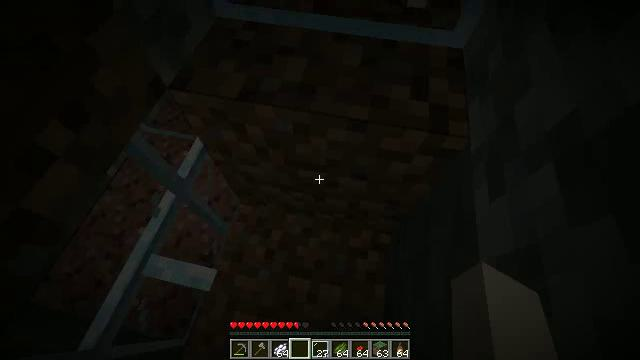

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9542.jpg


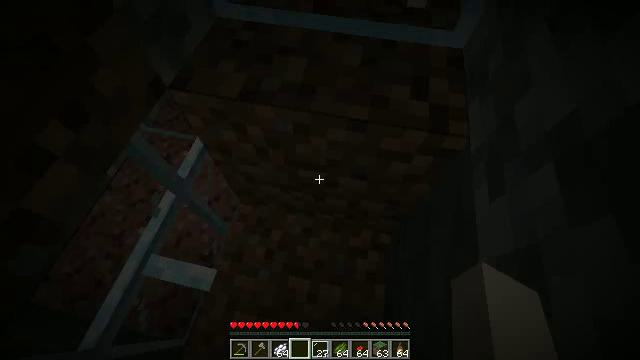

In [21]:
sample = df[df["hotbar.4"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 5

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         1.0
hotbar.6         0.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    6884.0
Name: 6884, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/6884.jpg


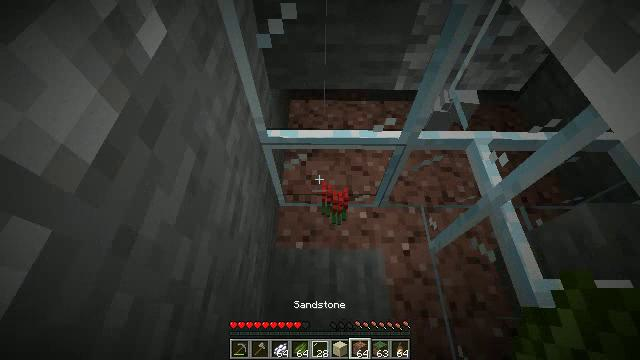

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/6885.jpg


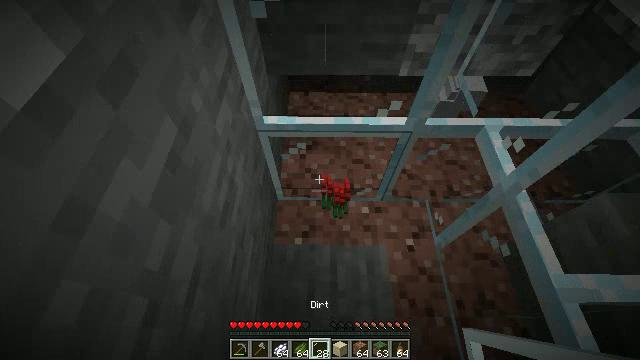

In [22]:
sample = df[df["hotbar.5"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 6

attack           0.0
back             0.0
forward          0.0
jump             0.0
left             0.0
right            0.0
sneak            0.0
sprint           0.0
use              0.0
drop             0.0
inventory        0.0
hotbar.1         0.0
hotbar.2         0.0
hotbar.3         0.0
hotbar.4         0.0
hotbar.5         0.0
hotbar.6         1.0
hotbar.7         0.0
hotbar.8         0.0
hotbar.9         0.0
ESC              0.0
camera1          0.0
camera2          0.0
startImage    9356.0
Name: 9356, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9356.jpg


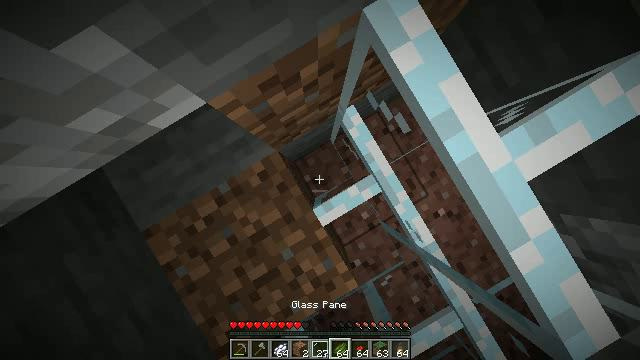

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9357.jpg


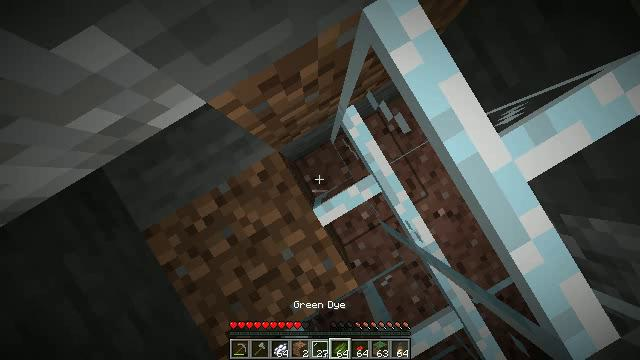

In [23]:
sample = df[df["hotbar.6"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)
    

### Show Sample of Changing Hotbar to 7

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
hotbar.1         0.000000
hotbar.2         0.000000
hotbar.3         0.000000
hotbar.4         0.000000
hotbar.5         0.000000
hotbar.6         0.000000
hotbar.7         1.000000
hotbar.8         0.000000
hotbar.9         0.000000
ESC              0.000000
camera1         -1.609499
camera2          0.000000
startImage    9408.000000
Name: 9408, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9408.jpg


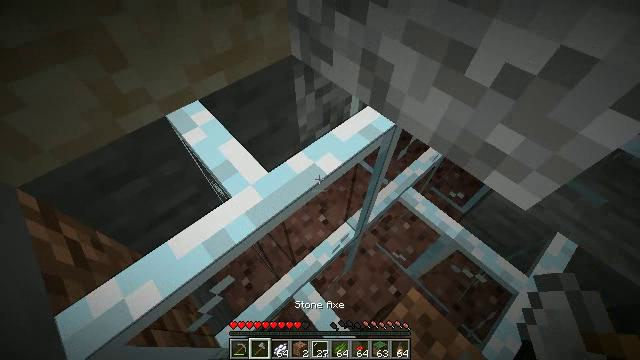

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/9409.jpg


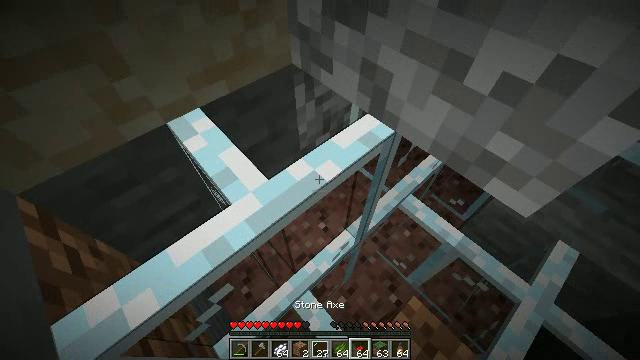

In [24]:
sample = df[df["hotbar.7"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 8

attack          0.0
back            0.0
forward         1.0
jump            0.0
left            0.0
right           0.0
sneak           0.0
sprint          0.0
use             0.0
drop            0.0
inventory       0.0
hotbar.1        0.0
hotbar.2        0.0
hotbar.3        0.0
hotbar.4        0.0
hotbar.5        0.0
hotbar.6        0.0
hotbar.7        0.0
hotbar.8        1.0
hotbar.9        0.0
ESC             0.0
camera1         0.0
camera2         0.0
startImage    864.0
Name: 864, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/864.jpg


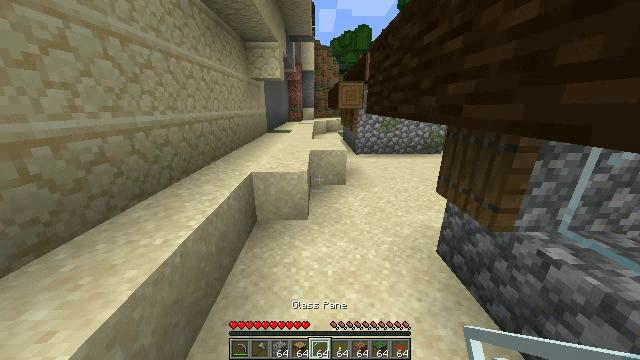

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/865.jpg


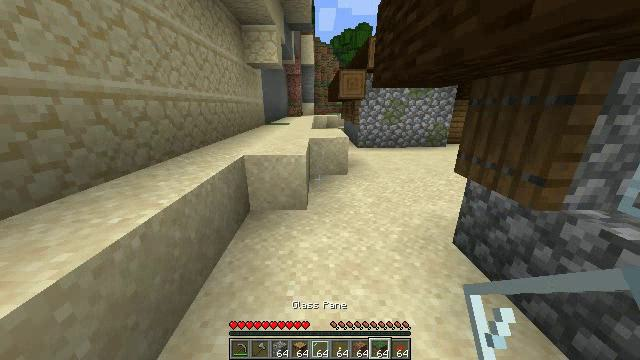

In [25]:
sample = df[df["hotbar.8"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Changing Hotbar to 9

attack            0.0
back              1.0
forward           0.0
jump              0.0
left              0.0
right             0.0
sneak             0.0
sprint            0.0
use               0.0
drop              0.0
inventory         0.0
hotbar.1          0.0
hotbar.2          0.0
hotbar.3          0.0
hotbar.4          0.0
hotbar.5          0.0
hotbar.6          0.0
hotbar.7          0.0
hotbar.8          0.0
hotbar.9          1.0
ESC               0.0
camera1           0.0
camera2           0.0
startImage    12980.0
Name: 12980, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/12980.jpg


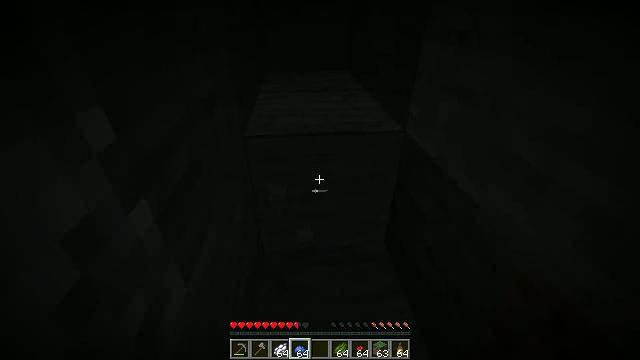

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/12981.jpg


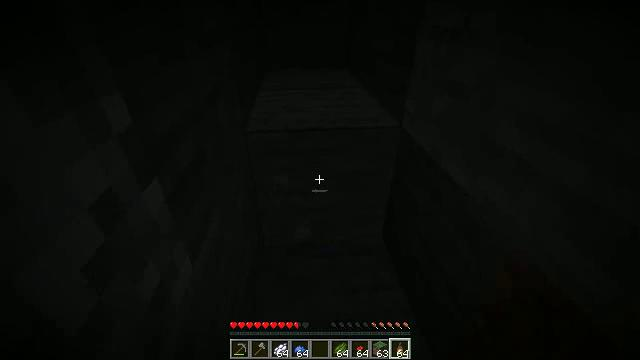

In [26]:
sample = df[df["hotbar.9"]==1].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Mouse (Y-Axis)

attack           0.000000
back             0.000000
forward          1.000000
jump             0.000000
left             0.000000
right            1.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        0.000000
hotbar.1         0.000000
hotbar.2         0.000000
hotbar.3         0.000000
hotbar.4         0.000000
hotbar.5         0.000000
hotbar.6         0.000000
hotbar.7         0.000000
hotbar.8         0.000000
hotbar.9         0.000000
ESC              0.000000
camera1          1.609499
camera2        -10.000000
startImage    5647.000000
Name: 5647, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/5647.jpg


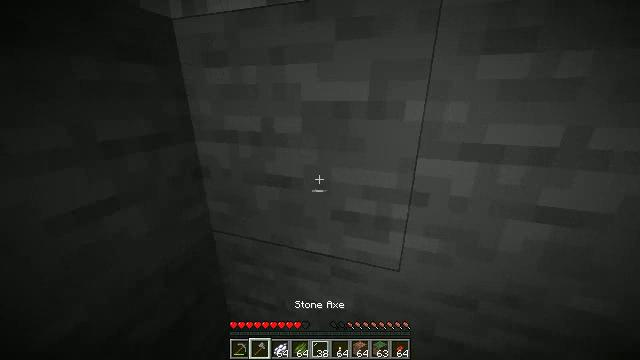

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/5648.jpg


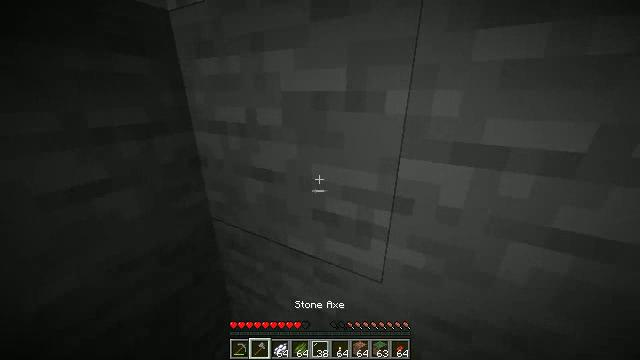

In [27]:
sample = df[df["camera1"]!=0].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)

### Show Sample of Moving Mouse (X-Axis)

attack           0.000000
back             0.000000
forward          0.000000
jump             0.000000
left             0.000000
right            0.000000
sneak            0.000000
sprint           0.000000
use              0.000000
drop             0.000000
inventory        1.000000
hotbar.1         0.000000
hotbar.2         0.000000
hotbar.3         0.000000
hotbar.4         0.000000
hotbar.5         0.000000
hotbar.6         0.000000
hotbar.7         0.000000
hotbar.8         0.000000
hotbar.9         0.000000
ESC              0.000000
camera1          1.609499
camera2         -0.615394
startImage    7150.000000
Name: 7150, dtype: float64
../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/7150.jpg


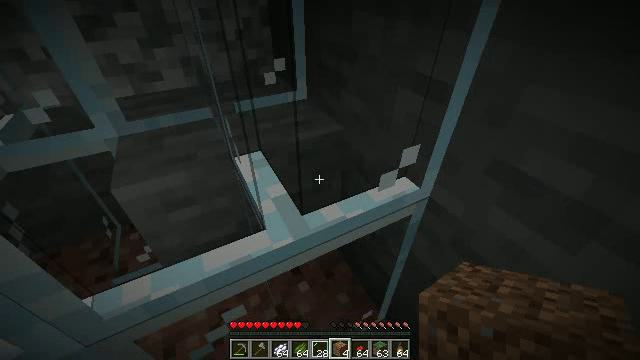

../assets/datasets/Move Classifier Data/MineRLBasaltBuildVillageHouse-v0/D2022-07-15-T03-08-52-461375/7151.jpg


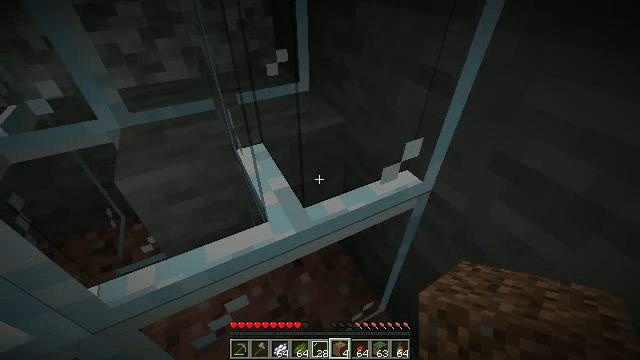

In [28]:
sample = df[df["camera2"]!=0].sample(1)
for index, move in sample.iterrows():
    print(move)
    showSample(path, int(move["startImage"]), NUMFRAMES)